## 数据集写入

In [96]:
import pandas as pd
import numpy as np

sample_submission_path = './sample_submission.csv'
data_path = './train.csv'
val_path = './test.csv'

In [97]:
sample_submission = pd.read_csv(sample_submission_path,sep=',')
Data = pd.read_csv(data_path,sep=',')
val = pd.read_csv(val_path,sep=',')
 

In [98]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(Data, test_size=0.2,random_state=42)

In [99]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6954 entries, 2333 to 7270
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   6954 non-null   object 
 1   HomePlanet    6786 non-null   object 
 2   CryoSleep     6777 non-null   object 
 3   Cabin         6796 non-null   object 
 4   Destination   6815 non-null   object 
 5   Age           6806 non-null   float64
 6   VIP           6792 non-null   object 
 7   RoomService   6828 non-null   float64
 8   FoodCourt     6814 non-null   float64
 9   ShoppingMall  6789 non-null   float64
 10  Spa           6820 non-null   float64
 11  VRDeck        6803 non-null   float64
 12  Name          6795 non-null   object 
 13  Transported   6954 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 767.4+ KB


In [100]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,6806.000000,6828.000000,6814.000000,6789.000000,6820.000000,6803.000000
mean,28.828093,222.822935,456.714705,175.499043,315.693842,304.189769
std,14.446399,674.900407,1574.797221,613.969158,1118.074541,1170.639327
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,46.000000,84.750000,30.000000,61.250000,49.500000
max,79.000000,14327.000000,27723.000000,23492.000000,18572.000000,24133.000000


In [101]:
train.isnull().sum() # 检查NaN的数字个数

PassengerId       0
HomePlanet      168
CryoSleep       177
Cabin           158
Destination     139
Age             148
VIP             162
RoomService     126
FoodCourt       140
ShoppingMall    165
Spa             134
VRDeck          151
Name            159
Transported       0
dtype: int64

In [102]:
train.groupby('Transported')['Transported'].count()

Transported
False    3454
True     3500
Name: Transported, dtype: int64

In [103]:
train.groupby(['HomePlanet', 'Transported'])['PassengerId'].count().reset_index()

,HomePlanet,Transported,PassengerId
0,Earth,False,2130
1,Earth,True,1561
2,Europa,False,586
3,Europa,True,1116
4,Mars,False,657
5,Mars,True,736


In [104]:
train['HomePlanet'].unique()

array(['Earth', 'Europa', 'Mars', nan], dtype=object)

In [105]:
train[(train['HomePlanet'] == 'Mars') & (train['Transported'] == True)].shape

(736, 14)

In [106]:
def calc_transported_pct(df, variable):
    '''
    Calculates the percentage of Transported for each ubique item in the variable value...
    '''
    for value in list(df[variable].unique()):
            transported_pct = np.divide(df[(df[variable] == value) & (df['Transported'] == True)].shape[0], df[(df[variable] == value)].shape[0]) 
            if transported_pct > 0:
                print(f'{transported_pct * 100: .2f} % Transported, {variable}: {value}')
    print("")

# Review the target variable information by HomePlanet...

attr_list  = ['HomePlanet','VIP', 'CryoSleep', 'Destination']
for attr in attr_list:
    calc_transported_pct(train, attr)


 42.29 % Transported, HomePlanet: Earth
 65.57 % Transported, HomePlanet: Europa
 52.84 % Transported, HomePlanet: Mars

 50.57 % Transported, VIP: False
 38.46 % Transported, VIP: True

 32.90 % Transported, CryoSleep: False
 81.96 % Transported, CryoSleep: True

 47.05 % Transported, Destination: TRAPPIST-1e
 60.91 % Transported, Destination: 55 Cancri e
 50.63 % Transported, Destination: PSO J318.5-22



/var/folders/70/f68hms5512gffmdv178wlrvc0000gn/T/ipykernel_8613/366798023.py:6: RuntimeWarning: invalid value encountered in true_divide
  transported_pct = np.divide(df[(df[variable] == value) & (df['Transported'] == True)].shape[0], df[(df[variable] == value)].shape[0])


In [107]:
train['Name']

2333        Loree Mathison
2589     Crisey Mcbriddley
8302        Alramix Myling
8177             Tros Pota
500         Achyon Nalanet
               ...        
5734          Therry Cames
5191           Herms Bancy
5390      Karena Briggston
860             Skix Kraie
7270    Alraium Disivering
Name: Name, Length: 6954, dtype: object

In [108]:
train['FamilyName'] = train['Name'].str.split(' ', 1, expand = True)[1]
train['IndividualName'] = train['Name'].str.split(' ', 1, expand = True)[0]

train['TravelingGroup'] = train['PassengerId'].str.split('_', 1, expand = True)[0]
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,FamilyName,IndividualName,TravelingGroup
2333,2513_01,Earth,False,NaN,TRAPPIST-1e,28.0,False,0.0,55.0,0.0,656.0,0.0,Loree Mathison,False,Mathison,Loree,2513
2589,2774_02,Earth,False,F/575/P,TRAPPIST-1e,17.0,False,0.0,1195.0,31.0,0.0,0.0,Crisey Mcbriddley,False,Mcbriddley,Crisey,2774
8302,8862_04,Europa,True,C/329/S,55 Cancri e,28.0,False,0.0,0.0,0.0,0.0,0.0,Alramix Myling,True,Myling,Alramix,8862
8177,8736_02,Mars,False,F/1800/P,TRAPPIST-1e,20.0,False,NaN,2.0,289.0,976.0,0.0,Tros Pota,True,Pota,Tros,8736
500,0539_02,Europa,True,C/18/P,55 Cancri e,36.0,False,0.0,0.0,0.0,0.0,0.0,Achyon Nalanet,True,Nalanet,Achyon,0539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,6076_01,Earth,NaN,G/988/S,TRAPPIST-1e,18.0,False,14.0,2.0,144.0,610.0,0.0,Therry Cames,True,Cames,Therry,6076
5191,5537_01,Mars,False,F/1063/S,TRAPPIST-1e,50.0,NaN,690.0,0.0,30.0,762.0,428.0,Herms Bancy,False,Bancy,Herms,5537
5390,5756_06,Earth,False,F/1194/P,PSO J318.5-22,22.0,False,158.0,0.0,476.0,0.0,26.0,Karena Briggston,False,Briggston,Karena,5756
860,0925_01,Mars,False,F/191/P,TRAPPIST-1e,34.0,False,379.0,0.0,1626.0,0.0,0.0,Skix Kraie,False,Kraie,Skix,0925


In [84]:
train.select_dtypes(['object']).head()


,PassengerId,HomePlanet,Destination,Name,Deck,Side
2333,2513_01,Earth,TRAPPIST-1e,Loree Mathison,F,P
2589,2774_02,Earth,TRAPPIST-1e,Crisey Mcbriddley,F,P
8302,8862_04,Europa,55 Cancri e,Alramix Myling,C,P
8177,8736_02,Mars,TRAPPIST-1e,Tros Pota,F,P
500,0539_02,Europa,55 Cancri e,Achyon Nalanet,C,P


## 缺失值处理

In [109]:
def filling_HomePlanet(df):
    mode = df['HomePlanet'].value_counts().index[0]
    df['HomePlanet'] = df['HomePlanet'].fillna(mode)
    return df

def filling_CryoSleep(df):
    df['CryoSleep'] = df['CryoSleep'].fillna(False)
    return df
    
# 客舱描述:旅客所在的客舱编号。格式为deck/num/side，其中side可以是P表示Port或S表示右舷。
def split_Cabin(df):
    df['Deck'] = df['Cabin'].str.split("/", n=2, expand=True)[0]
    df['Number'] = df['Cabin'].str.split("/", n=2, expand=True)[1]
    df['Side'] = df['Cabin'].str.split("/", n=2, expand=True)[2]
    df.pop('Cabin')
    return df

def filling_Cabin(df):
    df['Deck'] = df['Deck'].fillna('F')
    mode = df[df.Deck == 'F']['Side'].value_counts().index[0]
    df['Side'] = mode
    df['Number'] = df['Number'].astype(float)
    df['Number'] = df['Number'].fillna(1796 / 2)
    return df

def filling_Destination(df):
    mode = df['Destination'].value_counts().index[0]
    df['Destination'] = df['Destination'].fillna(mode)
    return df

def filling_VIP(df):
    df['VIP'] = df['VIP'].fillna(False)
    return df

def filling_Name(df):
    df['Name'] = df['Name'].fillna('None')
    return df

def filling_Age(df):
    median = df['Age'].describe()[5]
    df['Age'] = df['Age'].fillna(median)
    return df
    
def filling_luxury_features(df):
    luxury_features = ['RoomService','FoodCourt', 'ShoppingMall', 'Spa','VRDeck']
    df[luxury_features] = df[luxury_features].fillna(0.0)
    return df

In [110]:
def filling_numerical(df):
    df = filling_Age(df)
    df = filling_luxury_features(df)
    return df

def filling_categorical(df):
    df = filling_HomePlanet(df)
    df = filling_CryoSleep(df)
    df = split_Cabin(df)
    df = filling_Cabin(df)
    df = filling_Destination(df)
    df = filling_VIP(df)
    df = filling_Name(df)
    return df

def filling_missing(df):
    df = filling_categorical(df)
    df = filling_numerical(df)
    return df

Train = filling_missing(train)


## 数据探索

现在我们来检查一下偏度。偏度是一个实值随机变量关于其均值的概率分布的不对称性的度量。偏度值可以是正的、零的、负的或未定义的。对于单峰分布，负倾斜通常表示尾部在分布的左侧，正倾斜通常表示尾部在分布的右侧。在一条尾巴很长而另一条尾巴很粗的情况下，偏度并不遵循一个简单的规则。例如，值为零意味着均值两边的尾部总体平衡;这是对称分布的情况，但对于一个尾巴长而细，另一个尾巴短而胖的非对称分布也适用。偏度大于1通常被判定为偏度，所以主要检查大于1的偏度。

In [112]:
from scipy.stats import skew, kurtosis
skew(Train[Train.Age.isnull() == False]['Age'])

0.44360504969486925

现在我们来看峰度。在概率论和统计学中，峰度是对“尾部度”的一种度量。一个实值随机变量的概率分布。和偏斜度一样，峰度描述了概率分布的形状理论分布有不同的量化方法从总体样本中估计也有不同的方法。峰度的不同度量可能有不同的解释。由卡尔·皮尔森(Karl Pearson)提出的对分布峰度的标准度量，是该分布的第四阶矩的缩放版本。这个数字与分布的尾部有关，而不是峰值;因此，有时看到的峰度表征为“峰度peakedness”;是不正确的。对于这种度量，较高的峰度对应较大的偏差(或异常值)的极值，而不是接近平均值的数据配置。

In [114]:
kurtosis(Train[Train.Age.isnull() == False]['Age'])

0.19110018080039248

In [147]:
temp = Train[Train.Age.isnull() == False][['Transported','Age']]
temp['Transported'].replace([False, True], [0,1], inplace = True)
temp['Transported'] = temp.groupby('Age')['Transported'].transform('mean')

In [148]:
temp

,Transported,Age
2333,0.580952,28.0
2589,0.567797,17.0
8302,0.580952,28.0
8177,0.441964,20.0
500,0.473282,36.0
...,...,...
5734,0.526316,18.0
5191,0.500000,50.0
5390,0.469388,22.0
860,0.530973,34.0


Text(0, 0.5, 'Transported ratio %')

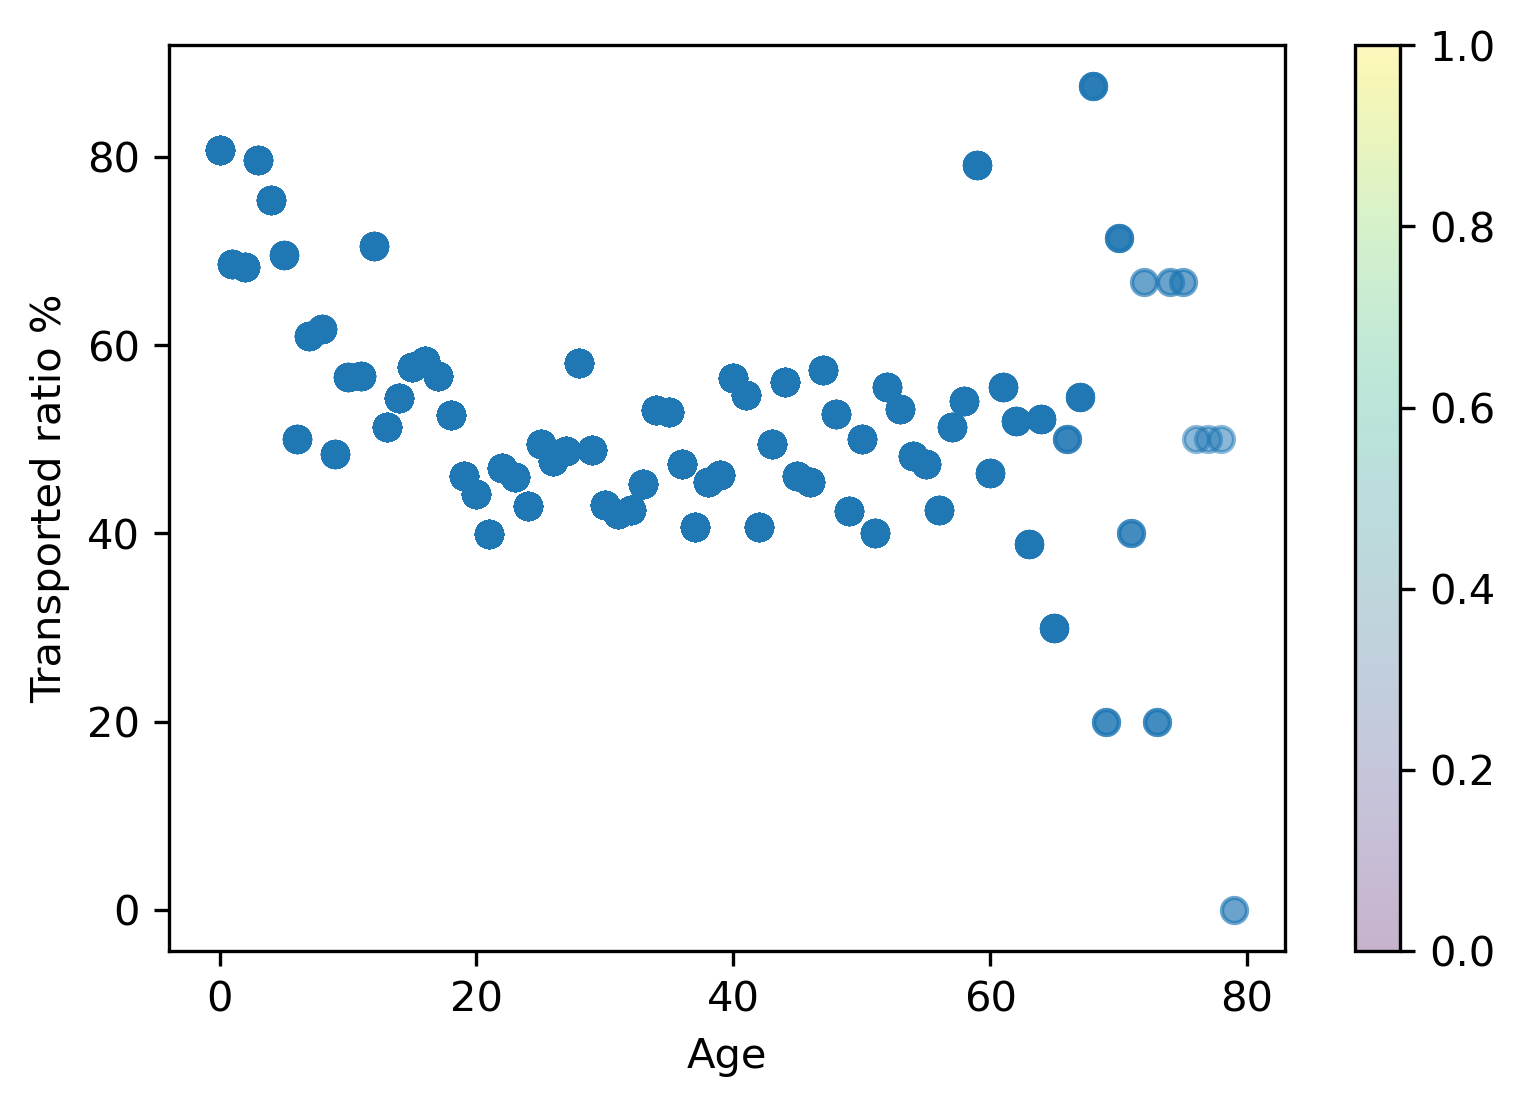

In [167]:
import matplotlib.pyplot as plt
plt.figure(dpi=300)
plt.scatter(temp['Age'],temp['Transported']*100,alpha=0.3)
plt.colorbar()
plt.xlabel( 'Age')
plt.ylabel('Transported ratio %' )

In [173]:
Train['Age'] = pd.qcut(Train['Age'], 10)
Train.head().style.set_properties(subset=['Age'], **{'background-color': 'lightseagreen'})

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,FamilyName,IndividualName,TravelingGroup,Deck,Number,Side
2333,2513_01,Earth,False,TRAPPIST-1e,"(27.0, 30.0]",False,0.000000,55.000000,0.000000,656.000000,0.000000,Loree Mathison,False,Mathison,Loree,2513,F,898.000000,P
2589,2774_02,Earth,False,TRAPPIST-1e,"(13.0, 18.0]",False,0.000000,1195.000000,31.000000,0.000000,0.000000,Crisey Mcbriddley,False,Mcbriddley,Crisey,2774,F,575.000000,P
8302,8862_04,Europa,True,55 Cancri e,"(27.0, 30.0]",False,0.000000,0.000000,0.000000,0.000000,0.000000,Alramix Myling,True,Myling,Alramix,8862,C,329.000000,P
8177,8736_02,Mars,False,TRAPPIST-1e,"(18.0, 21.0]",False,0.000000,2.000000,289.000000,976.000000,0.000000,Tros Pota,True,Pota,Tros,8736,F,1800.000000,P
500,0539_02,Europa,True,55 Cancri e,"(35.0, 40.0]",False,0.000000,0.000000,0.000000,0.000000,0.000000,Achyon Nalanet,True,Nalanet,Achyon,0539,C,18.000000,P


## 建模

In [80]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import StratifiedShuffleSplit  # 引入的库可以进行分层抽样
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer


cat_list = ['HomePlanet','CryoSleep' ,'Destination' ,'VIP' ]
num_list = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','Age']


num_pipeline = Pipeline([
            ('imputer', SimpleImputer(strategy="median")),
            ('std_scaler', StandardScaler()),
])
    
cat_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("cat_encoder", OneHotEncoder(sparse=False)),
])

full_pipeline = ColumnTransformer([
            ("num", num_pipeline, num_list),
            ("cat",cat_pipeline, cat_list),
])

target = full_pipeline.fit_transform(train[num_list+cat_list])
test_target = full_pipeline.transform(test[num_list+cat_list])
val_target =  full_pipeline.transform(val[num_list+cat_list])


In [219]:
target_label = np.array(train['Transported']*1.0)
test_label = np.array(test['Transported']*1.0)

In [231]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier

random_forest_clf = RandomForestClassifier(n_estimators=1000, random_state=42)
extra_trees_clf = ExtraTreesClassifier(n_estimators=1000, random_state=42)
svm_clf = LinearSVC(max_iter=100, tol=20, random_state=42)
mlp_clf = MLPClassifier( max_iter=100,random_state=42)
named_estimators = [
    ("random_forest_clf", random_forest_clf),
    ("extra_trees_clf", extra_trees_clf),
    ("svm_clf", svm_clf),
    ("mlp_clf",mlp_clf),
]
voting_clf = VotingClassifier(named_estimators)



voting_clf.fit(target, target_label )


VotingClassifier(estimators=[('random_forest_clf',
                              RandomForestClassifier(n_estimators=1000,
                                                     random_state=42)),
                             ('extra_trees_clf',
                              ExtraTreesClassifier(n_estimators=1000,
                                                   random_state=42)),
                             ('svm_clf', LinearSVC(random_state=42, tol=20)),
                             ('mlp_clf',
                              MLPClassifier(max_iter=1000, random_state=42))])

In [232]:
predictions =  voting_clf.predict(test_target)
predictions

array([0., 1., 1., ..., 0., 1., 0.])

In [233]:
from sklearn.model_selection import cross_val_score
from scipy import stats
from sklearn.metrics import accuracy_score
scores = cross_val_score(voting_clf  ,test_target[:,:-1] , test_label.reshape(test_label.shape[0]) ,cv=10)
score = scores.mean()
print('score ', score )


accuracy_score = accuracy_score(test_label, predictions, normalize=True, sample_weight=None)
print('accuracy_score',accuracy_score)

score  0.7647863929307024
accuracy_score 0.7745830937320299


In [226]:
predictions =  voting_clf.predict(val_target)

In [ ]:
target.shape

(8693, 18)

In [227]:
predictions 

array([1., 0., 1., ..., 1., 1., 0.])